In [ ]:

!pip install jupyter-dash


In [ ]:
!pip install altair

In [21]:
#%load_ext autoreload
#%autoreload 2
#%load_ext autoreload
#%autoreload 2
import pandas as pd
import plotly.express as px
from dash import Dash,jupyter_dash, Input, Output, dcc, html,State
from IPython.display import VimeoVideo
from jupyter_dash import JupyterDash
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import altair as alt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as skp
from sklearn.neighbors import KNeighborsClassifier
from dash import jupyter_dash
#JupyterDash.infer_jupyter_proxy_config()

In [22]:
df = pd.read_excel("Agriculture Sector.xlsx")

print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (99849, 13)


,State_Name,Crop_Type,Crop,N,P,K,rainfall,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,andhra pradesh,kharif,cotton,120,40,20,654.34,7300.0,9400.0,1.29,NaN,NaN,NaN
1,andhra pradesh,kharif,horsegram,20,60,20,654.34,3300.0,1000.0,0.30,NaN,NaN,NaN
2,andhra pradesh,kharif,jowar,80,40,40,654.34,10100.0,10200.0,1.01,NaN,NaN,NaN
3,andhra pradesh,kharif,maize,80,40,20,654.34,2800.0,4900.0,1.75,NaN,NaN,NaN
4,andhra pradesh,kharif,moong,20,40,20,654.34,1300.0,500.0,0.38,NaN,NaN,NaN


In [23]:
# prompt: drop unnamed columns

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df2= df.select_dtypes(include='number')


In [4]:
%reload_ext autoreload

In [16]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #Build model
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    # Train model
    model.fit(df2)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # Calculate silhouette_scores
    silhouette_scores.append(
        silhouette_score(df2,model.named_steps["kmeans"].labels_)
    )

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)

print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [555067.1856075893, 438346.1910709699, 354808.7440975467, 312040.99025154806, 272389.0808084646, 243816.74355704282, 216875.6579691224, 198431.61056443845, 181188.8051125822, 169032.84051715824, 158156.18074853445]
silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [-0.18772879301957604, 0.024901353500185387, -0.24088553971512794, -0.4020421111229971, -0.407129758525766, -0.43074565680761484, -0.3717335783386624, -0.3355441969544764, -0.3478366530646704, -0.3469909392363836, -0.36284839326243973]


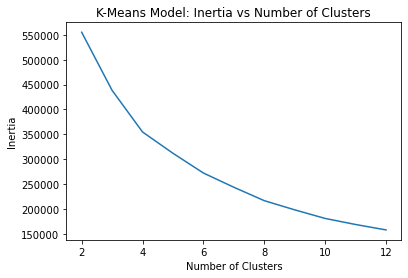

In [24]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

Text(0.5, 1.0, 'K-Means Model: Silhouette Score vs Number of Clusters')

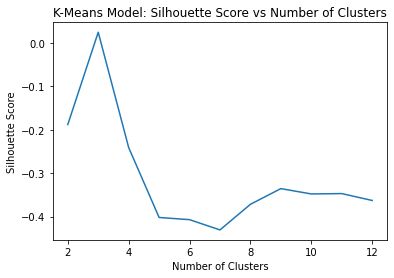

In [25]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters")

TypeError: unhashable type: 'list'

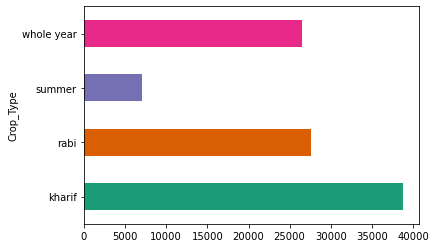

In [27]:
# @title Crop_Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Crop_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
scaler = StandardScaler()

In [29]:
from dash import Dash,jupyter_dash, Input, Output, dcc, html,State
from IPython.display import VimeoVideo
from jupyter_dash import JupyterDash
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Corban"),
    html.H2("Interactive Dashboard"),
    dcc.Dropdown(
        id="dropdown",
        options=["Barplot", "Scatterplot"],
        value="Barplot"),
    html.P("This is an interactive dashboard of Agriculture data of India"),
    dcc.Graph(id="bar-chart"),
    dcc.RadioItems(
            options=[
            {"label":"trimmed", "value":True},
            {"label":"not trimmed", "value":False}
            ],
            value=True,
            id="trim-button"
        ),
    dcc.Graph(id="pca-scatter"),
    html.H3("Choose your preferred number of clusters"),
    dcc.Slider(min=2,max=13,step=1,value=2,id="k-slider"),
    html.Div(id="metrics"),
    html.H2("Prediction Dashboard"),
    html.Div([
      html.H3("Enter values for prediction:"),
      dcc.Input(id='input-N', type='number', placeholder='Enter value for N'),
      dcc.Input(id='input-P', type='number', placeholder='Enter value for P'),
      dcc.Input(id='input-K', type='number', placeholder='Enter value for K'),
      dcc.Input(id='input-rainfall', type='number', placeholder='Enter value for rainfall'),
      dcc.Input(id='input-Area_in_hectares', type='number', placeholder='Enter value for Area_in_hectares'),
      dcc.Input(id='input-Production_in_tons', type='number', placeholder='Enter value for Production_in_tons'),
      dcc.Input(id='input-Yield_ton_per_hec', type='number', placeholder='Enter value for Yield_ton_per_hec'),
      html.Button('Submit', id='submit-val', n_clicks=0),
      html.Div(id='prediction-output')
  ])


])




In [ ]:
!pip install -U kaleido

In [30]:
def get_high_var_features(trimmed=True, return_feat_names=True):

    """Returns the five highest-variance features of ``df``.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    return_feat_names : bool, default=False
        If ``True``, returns feature names as a ``list``. If ``False``
        returns ``Series``, where index is feature names and values are
        variances.
    """
    # Calcutate Variance
    if trimmed:
        top_five_features=(
            df2.apply(trimmed_var).sort_values().tail(5)
        )
    else:
        top_five_features=df2.var().sort_values().tail(5)
    return top_five_features


def get_model_metrics(trimmed=True,k=2,return_metrics=False):

    """Build ``KMeans`` model based on five highest-variance features in ``df``.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.

    return_metrics : bool, default=False
        If ``False`` returns ``KMeans`` model. If ``True`` returns ``dict``
        with inertia and silhouette score.

    """
    # Get High var features
    features = get_high_var_features(trimmed=trimmed, return_feat_names=True).index.to_list()
    # Create feature metrics
    X = df[features]
    # Build model
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42,n_init=10))
    model.fit(X)
    if return_metrics:
        # Calculate Inertia
        i=model.named_steps['kmeans'].inertia_

        # Calculate Silehoutte score
        ss = silhouette_score(X,model.named_steps['kmeans'].labels_)
        # Put results into dictionary
        metrics= {
        "inertia":round(i),
        "silhouette_score":round(ss,3)
        }

        # Return dictionary to users
        return metrics
    return model

def get_pca_labels(trimmed=True,k=2):

    """
    ``KMeans`` labels.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    features = get_high_var_features(trimmed=trimmed, return_feat_names=True).index.to_list()
    # Create feature metrics
    X = df[features]

    # Build transformer
    transformer=PCA(n_components=2,random_state=42)

    # Transform data
    X_t = transformer.fit_transform(X)

    X_pca=pd.DataFrame(X_t, columns=["PC1","PC2"])

    #Add labels
    model= get_model_metrics(trimmed=trimmed,k=k, return_metrics=False)
    X_pca['labels']=model.named_steps['kmeans'].labels_.astype(str)
    X_pca.sort_values('labels',inplace=True)
    return X_pca





In [31]:
def serve_bar_chart(trimmed=True):

    """Returns a horizontal bar chart of five highest-variance features.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.
    """
    #Get features
    top_five_features=get_high_var_features(trimmed=trimmed, return_feat_names=False)
    #Build bar chart
    fig=px.bar(x=top_five_features,y=top_five_features.index,orientation='h')
    fig.update_layout(xaxis_title="Variance",yaxis_title="features")

    return fig

serve_bar_chart(trimmed=True)

In [32]:
@app.callback(
    Output('prediction-output', 'children'),
    Input('submit-val', 'n_clicks'),
    State('input-N', 'value'),
    State('input-P', 'value'),
    State('input-K', 'value'),
    State('input-rainfall', 'value'),
    State('input-Area_in_hectares', 'value'),
    State('input-Production_in_tons', 'value'),
    State('input-Yield_ton_per_hec', 'value')
)
def update_prediction(n_clicks, N, P, K, rainfall, Area_in_hectares, Production_in_tons, Yield_ton_per_hec):
    if n_clicks > 0:
        user_inputs = {
            'N': N,
            'P': P,
            'K': K,
            'rainfall': rainfall,
            'Area_in_hectares': Area_in_hectares,
            'Production_in_tons': Production_in_tons,
            'Yield_ton_per_hec': Yield_ton_per_hec
        }


        # Scale the user input and the existing data separately

        scaled_data = scaler.fit_transform(df2)
        # Combine the scaled data

        scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

        #scaled_df = pd.concat([df, pd.DataFrame(scaled_user_input, columns=df2.columns[:-1])])

        # Train the KNN model
        df_neigh = KNeighborsClassifier(n_neighbors=4)
        df_neigh.fit(scaled_df, df['Crop_Type'])  # Train on all but the last row (user input)

        # Make the prediction
        user_df = pd.DataFrame([user_inputs])
        scaled_user_input = scaler.transform(user_df)
        user_prediction = df_neigh.predict(scaled_user_input)
        return f"Your preferred season is '{user_prediction[0]}'"

    return ""



@app.callback(
    Output("bar-chart" , "figure"),Input("trim-button", "value")
)

def serve_bar_chart(trimmed=True):
      """Returns a horizontal bar chart of five highest-variance features and optionally saves it.

      Parameters
      ----------
      trimmed : bool, default=True
          If ``True``, calculates trimmed variance, removing bottom and top 10%
          of observations.
      save_path : str, optional
          If provided, saves the figure to the specified path. The file format is inferred from the extension.
      """
      # Get features
      top_five_features = get_high_var_features(trimmed=trimmed, return_feat_names=False)

      # Build bar chart
      fig = px.bar(x=top_five_features, y=top_five_features.index, orientation='h')
      fig.update_layout(xaxis_title="Variance", yaxis_title="Features")


      return fig


@app.callback(
    Output("metrics", "children"),
    Input("trim-button", "value"),
    Input("k-slider", "value")
)
def serve_metrics(trimmed=True,k=2):

    """Returns list of ``H3`` elements containing inertia and silhouette score
    for ``KMeans`` model.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    # Get metrics
    metrics=get_model_metrics(trimmed=trimmed,k=k, return_metrics=True)
    # Add metrics to HTML elements
    text= [
        html.H3(f"Inertia {metrics['inertia']}"),
        html.H3(f"Silhoutte Score {metrics['silhouette_score']}")
    ]

    return text

@app.callback(
    Output("pca-scatter", "figure"),
    Input("trim-button", "value"),
    Input("k-slider", "value")
)
def serve_scatter_plot(trimmed=True,k=2):

    """Build 2D scatter plot of ``df`` with ``KMeans`` labels.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    fig= px.scatter(
        data_frame= get_pca_labels(trimmed=trimmed,k=k),
        x="PC1",
        y="PC2",
        color="labels",
        title="PCA representation of Clusters"
    )
    fig.update_layout(xaxis_title="PC1",yaxis_title="PC2")
    return fig

In [33]:
if __name__ == '__main__':
    app.run_server(debug=True)

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)


In [ ]:
serve_bar_chart(trimmed=True)

In [ ]:
# prompt: put into a dataframe

scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

print("scaled_df type:", type(scaled_df))
print("scaled_df shape:", scaled_df.shape)
scaled_df.head()


In [ ]:
df_neigh = KNeighborsClassifier(n_neighbors=4)
df_neigh.fit(scaled_df,df['Crop_Type'])
df_neigh_predictions = df_neigh.predict(scaled_df)
df_neigh_predictions

In [ ]:
def update_prediction(n_clicks, N, P, K, rainfall, Area_in_hectares, Production_in_tons, Yield_ton_per_hec):
    if n_clicks > 0:
        user_inputs = {
            'N': N,
            'P': P,
            'K': K,
            'rainfall': rainfall,
            'Area_in_hectares': Area_in_hectares,
            'Production_in_tons': Production_in_tons,
            'Yield_ton_per_hec': Yield_ton_per_hec
        }


        # Scale the user input and the existing data separately

        scaled_data = scaler.fit_transform(df2)
        # Combine the scaled data

        scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

        #scaled_df = pd.concat([df, pd.DataFrame(scaled_user_input, columns=df2.columns[:-1])])

        # Train the KNN model
        df_neigh = KNeighborsClassifier(n_neighbors=4)
        df_neigh.fit(scaled_df, df['Crop_Type'])  # Train on all but the last row (user input)

        # Make the prediction
        user_df = pd.DataFrame([user_inputs])
        scaled_user_input = scaler.transform(user_df)
        user_prediction = df_neigh.predict(scaled_user_input)
        return f"Your preferred season is '{user_prediction[0]}'"

    return ""
update_prediction(1, 70, 90, 176, 2888834, 453, 342, 53.9)

In [ ]:
df2.columns

In [ ]:
scaled_data = scaler.fit_transform(df2)
        # Combine the scaled data

scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

        #scaled_df = pd.concat([df, pd.DataFrame(scaled_user_input, columns=df2.columns[:-1])])

# Train the KNN model
df_neigh = KNeighborsClassifier(n_neighbors=4)
df_neigh.fit(scaled_df, df['Crop_Type'])  # Train on all but the last row (user input)


In [ ]:
df2.columns

In [ ]:
# Define the variables with appropriate values
N = 120
P = 20
K = 155
rainfall = 1765400  # Example value in millimeters
Area_in_hectares = 31351.5
Production_in_tons = 12325.0
Yield_ton_per_hec = 4.55

# Now create the dictionary
user = {
    'N': N,
    'P': P,
    'K': K,
    'rainfall': rainfall,
    'Area_in_hectares': Area_in_hectares,
    'Production_in_tons': Production_in_tons,
    'Yield_ton_per_hec': Yield_ton_per_hec
}

print(user)


In [ ]:
user_df = pd.DataFrame([user])
scaled_user_input = scaler.transform(user_df)
user_prediction = df_neigh.predict(scaled_user_input)
user_prediction